# Word Embeddings Playground

In [1]:
import numpy as np
from tqdm import tqdm
import json
import io

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
def loadGloveModel(gloveFile):
    f = gloveFile.split('\n')
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        print(word, embedding.shape)
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [0]:
# cargar pre-trained embeddings
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving glove.6B.50d.txt to glove.6B.50d (1).txt


In [4]:
glove = uploaded['glove.6B.50d.txt']
glove = io.StringIO(glove.decode('utf-8')).getvalue()

model = loadGloveModel(glove)

NameError: ignored

In [0]:
emb_matrix = np.zeros(shape=(len(model), 50))
for i, (w, vector) in enumerate(model.items()):
    emb_matrix[i,:] = vector
    model[w] = i

In [0]:
id2w = {i:w for w, i in model.items()}

In [0]:
'somethin' in model

True

In [0]:
model['somethin']

160571

In [0]:
emb_matrix[model['somethin']]

array([ 0.66974 , -0.59066 ,  0.68946 , -0.7153  , -0.43256 , -1.0108  ,
        0.33075 ,  0.51827 ,  0.12218 ,  1.4172  ,  0.096184,  0.99348 ,
       -0.25701 ,  0.71415 ,  0.19841 ,  0.29025 ,  0.2074  , -0.53624 ,
        0.45085 ,  0.85806 , -0.4907  , -0.22335 ,  0.64903 ,  0.769   ,
        0.29994 ,  0.1701  , -1.5357  ,  0.10448 , -0.072813, -0.48206 ,
       -1.3385  ,  0.094739,  0.27731 ,  0.79629 ,  0.20917 , -1.085   ,
        0.68439 , -0.93578 , -0.35764 , -0.54905 , -0.54489 , -0.83458 ,
       -0.089738,  0.62343 , -0.29961 , -0.48178 ,  0.08476 ,  0.21793 ,
        0.84447 ,  0.33012 ])

# Operations with word embeddings
![embedding.png](https://i.stack.imgur.com/V43vF.png)

In [0]:
def get_similars(w, emb_matrix, k_close=10):
    closest = []
    distances = cosine_similarity(w, emb_matrix).flatten()
    ind = np.argpartition(distances, -k_close)[-k_close:]
    distances_top = distances[ind]
    for _id in np.argsort(distances_top):
        closest.append((id2w[ind[_id]], distances_top[_id]))
    return list(reversed(closest))

In [2]:
result = emb_matrix[model['king']] - emb_matrix[model['man']] + emb_matrix[model['woman']]
w = result.reshape(1,-1)
get_similars(w, emb_matrix)

NameError: ignored

In [0]:
result = emb_matrix[model['father']] - emb_matrix[model['man']] + emb_matrix[model['woman']]
w = result.reshape(1,-1)
get_similars(w, emb_matrix)

sister 0.8269602829460657
granddaughter 0.8314775775715993
married 0.84328477690781
niece 0.8455237075479505
husband 0.8724399015852298
grandmother 0.8857059866589925
father 0.9009040058936405
wife 0.9084324641197451
daughter 0.9308127621964659
mother 0.9371241533517476


# Capitales

In [0]:
result = emb_matrix[model['paris']] - emb_matrix[model['france']] + emb_matrix[model['sweden']]
w = result.reshape(1,-1)
get_similars(w, emb_matrix)

copenhagen 0.6850489353455329
prague 0.687911369634993
helsinki 0.6922707876798946
istanbul 0.702399369281707
amsterdam 0.7096433415209844
vienna 0.7471015040584723
budapest 0.7585625483820376
sweden 0.7608667722197164
gothenburg 0.7783297398549466
stockholm 0.9233033815086633


In [0]:
w=emb_matrix[model['stockholm']]
similars = get_similars(w, emb_matrix, 5000)
similars[0:10]

/home/tmdavid/anaconda3/envs/MythNLP/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[('stockholm', 0.9999999999999998),
 ('budapest', 0.8306506157502186),
 ('vienna', 0.8208019899064262),
 ('gothenburg', 0.8140538605763172),
 ('helsinki', 0.7837531903197905),
 ('istanbul', 0.7655346905806629),
 ('prague', 0.7653634153904572),
 ('copenhagen', 0.762959658076572),
 ('amsterdam', 0.7489340381278285),
 ('berlin', 0.7292351856319945)]

In [0]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [9]:
capitals = uploaded['global_capitals.json']

capitals = json.loads(capitals)

print(capitals.keys())

capitals = [c.lower() for cont in capitals.values() for c in cont]
capitals[0:10]

dict_keys(['Africa', 'Oceania', 'North America', 'Europe', 'South America', 'Asia'])


['luanda',
 'ouagadougou',
 'bujumbura',
 'porto-novo',
 'gaborone',
 'kinshasa',
 'brazzaville',
 'yamoussoukro',
 'yaoundã©',
 'praia']

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

fitting... (5000, 50)
(50, 2)


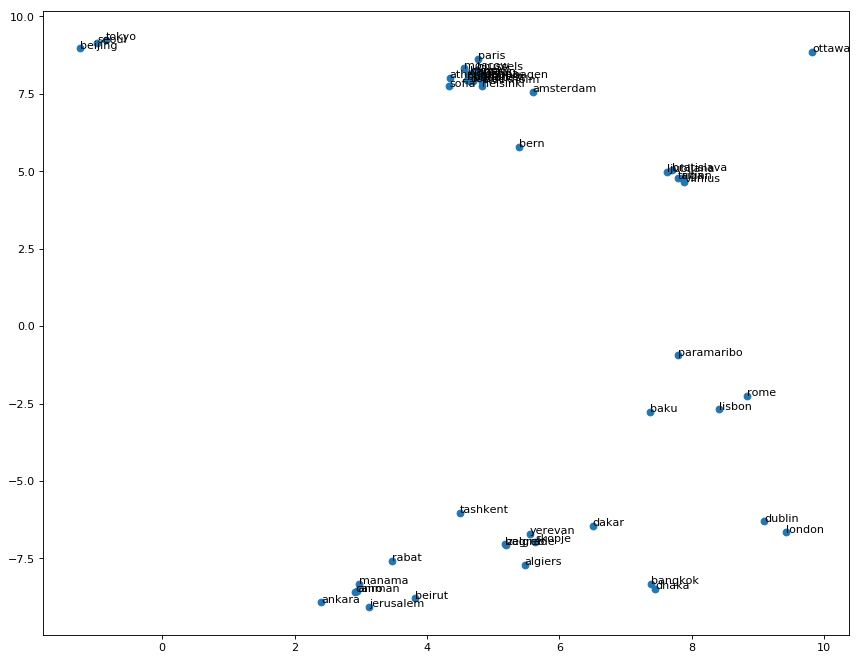

In [0]:
tsne = TSNE()
c_similars = [x for x, _ in similars]
map_real_w = {model[x]:i for i, x in enumerate(c_similars)}
w_similars = np.array([emb_matrix[model[x]] for x in c_similars])
#fiteamos los 10k closests
print('fitting...', w_similars.shape)
# data_tsne=tsne.fit_transform(w_similars)

#buscamos las capitales
c_similars = [c for c in c_similars if c.lower() in capitals]
id_capital = [map_real_w[model[x]] for x in c_similars][0:50]

data = data_tsne[id_capital]
print(data.shape)
fig=plt.figure(figsize=(13, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o',
    cmap=plt.get_cmap('Spectral'))

for label, x, y in zip(c_similars, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y))

plt.show()


In [0]:
numeros = [str(i) for i in range(10)]
escritos = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
months = ['january', 'february', 'march', 'april', 'may','june', 'july', 'august', 'september', 'october', 'november', 'december']
various = numeros+escritos+months

/home/tmdavid/anaconda3/envs/MythNLP/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


fitting... (5000, 50)
['1', '2', '3', '4', '5', '6', '8', '7', '9', '0', 'six', 'five', 'eight', 'four', 'three', 'seven', 'one', 'nine', 'two', 'zero']
[0, 1, 2, 3, 4]
(20, 2)


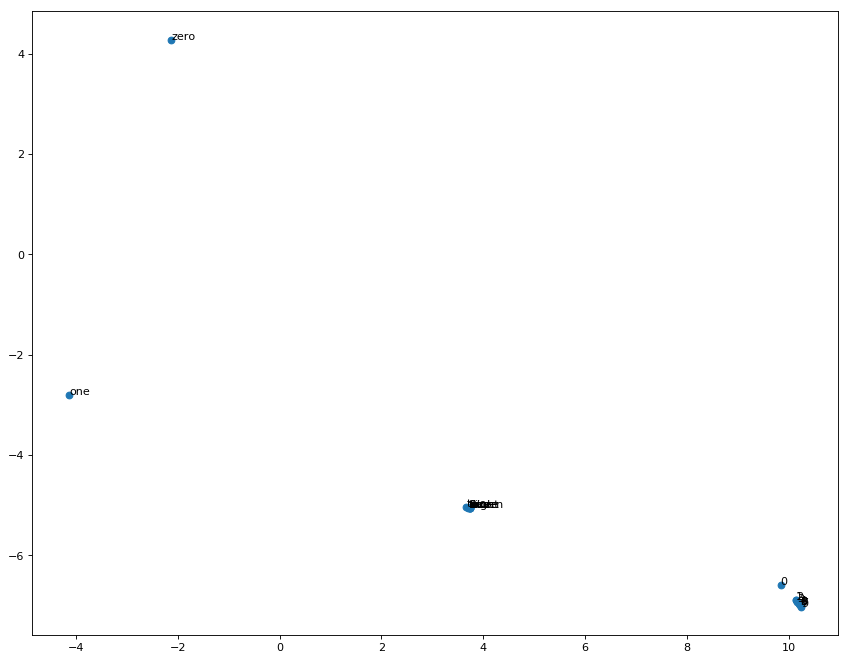

In [0]:
w=emb_matrix[model['1']]
similars = get_similars(w, emb_matrix, 5000)
similars[0:10]

c_similars = [x for x, _ in similars]
map_real_w = {model[x]:i for i, x in enumerate(c_similars)}
w_similars = np.array([emb_matrix[model[x]] for x in c_similars])
#fiteamos los 10k closests
print('fitting...', w_similars.shape)
# data_tsne=tsne.fit_transform(w_similars)


#que queremos mostrar
c_similars = [c for c in c_similars if c in various]
print(c_similars)
id_capital = [map_real_w[model[x]] for x in c_similars]
print(id_capital[0:5])
data = data_tsne[id_capital]
print(data.shape)
fig=plt.figure(figsize=(13, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o',
    cmap=plt.get_cmap('Spectral'))

for label, x, y in zip(c_similars, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y))

plt.show()

In [0]:
result = emb_matrix[model['barcelona']] - emb_matrix[model['madrid']] + emb_matrix[model['match']]
w = result.reshape(1,-1)
get_similars(w, emb_matrix)[1:]

final 0.7868812992726143
qualifying 0.7942274522466326
semifinal 0.8086967117710414
wimbledon 0.8172270733920566
cup 0.8182037956835304
finals 0.8281184634562766
champions 0.8360396184965838
tournament 0.8428395104732469
matches 0.8485891170985843
match 0.9271854198397441


In [0]:
result = emb_matrix[model['running']] - emb_matrix[model['run']] + emb_matrix[model['eat']]
w = result.reshape(1,-1)
get_similars(w, emb_matrix)[1:]

cooked 0.7056695334040772
kids 0.7165631192933052
vegetables 0.7348478565227136
dogs 0.739524004632995
feed 0.7537416802911012
eats 0.7596990042929839
eaten 0.7765408209924793
ate 0.7819073395634142
eating 0.8119893586957836
eat 0.9184904238185005


# which word isnt from the group

In [0]:
def not_belongs(words):
    ids = [model[word] for word in words]
    embs_avg = np.mean(emb_matrix[ids], axis=0).reshape(1,-1)
    min_id = 1.5
    id_out = -1
    for id_list, word in enumerate(words):
        w = emb_matrix[model[word]].reshape(1,-1)
        distance = cosine_similarity(w, embs_avg).flatten()[0]
        if distance < min_id:
            min_id = distance
            id_out = id_list
    return id_out

In [0]:
words = ['barcelona', 'madrid', 'sevilla', 'vigo', 'paris']
id_out = not_belongs(words)
print('{} es la que menos se parece a la lista de palabras dada'.format(words[id_out]))

paris es la que menos se parece a la lista de palabras dada


In [0]:
words = ['colombia', 'ecuador', 'uruguay', 'argentina', 'chile', 'españa']
id_out = not_belongs(words)
print('{} es la que menos se parece a la lista de palabras dada'.format(words[id_out]))

españa es la que menos se parece a la lista de palabras dada


In [0]:
words = ['girl', 'aunt', 'mother', 'jose']
id_out = not_belongs(words)
print('{} es la que menos se parece a la lista de palabras dada'.format(words[id_out]))

jose es la que menos se parece a la lista de palabras dada


# Word Embeddings as spellchecker

In [0]:
k_close = 10
incorrect = 'helo'
correct = 'hello'

In [0]:
w = emb_matrix[model[incorrect]].reshape(1,-1)
print(w.shape)

distances = cosine_similarity(w, emb_matrix).flatten()
ind = np.argpartition(distances, -k_close)[-k_close:]
distances_top = distances[ind]
print(ind)
for _id in np.argsort(distances_top):
    print(id2w[ind[_id]], distances_top[_id])
print()

(1, 50)
[187438 183648 384735 389452 398891  95949 108916  18561 308957 348383]
malli 0.7184339262172893
siya 0.7203930551079358
drey 0.7223484174289334
gorath 0.722503381108521
annu 0.7367623709415159
selvi 0.7390961563508992
kurama 0.7416039060772871
vondas 0.7485056574852428
alcmene 0.7882764733544039
helo 1.0000000000000002



In [0]:
print(emb_matrix[ind].shape)
w_correct = emb_matrix[model[correct]].reshape(1,-1)
w_differences = emb_matrix[ind] - w_correct
print(w_differences.shape)
average_error = np.mean(w_differences, axis=0).reshape(1,-1)
print(average_error.shape)
print(average_error)

(10, 50)
(10, 50)
(1, 50)
[[ 1.1149278  -0.8721022  -0.0142635  -0.1907941   0.3884763   0.5464273
   1.135964    0.4982934   0.1761414  -0.54630722  0.4668161  -0.046323
  -0.30576323 -0.3509513  -1.0055357   0.5782003   0.7726898  -0.6458752
   0.3893273   0.704763    0.0868132  -0.40848559 -0.42945158 -0.2453835
  -0.45922     1.315824    1.2866231  -0.63389124 -0.4229529   1.0407704
  -2.11319     0.0119795   0.4518902  -0.21347     1.1437389   0.4026314
  -0.57219     0.711413   -0.232572    0.7559686  -0.32707368 -0.0315509
   0.4092255   0.096214   -0.28610014 -0.595698    0.500294    0.6524988
   0.3973921  -0.6183209 ]]


In [0]:
w_corrected = emb_matrix[model[incorrect]].reshape(1,-1)-average_error
w_corrected.shape

(1, 50)

In [0]:
distances = cosine_similarity(w_corrected, emb_matrix).flatten()
ind = np.argpartition(distances, -k_close)[-k_close:]
distances_top = distances[ind]
for _id in np.argsort(distances_top):
    print(id2w[ind[_id]], distances_top[_id])

daddy 0.6959288779641377
goodnight 0.7026923276787009
mommy 0.7094825423849568
wow 0.7129241473069308
exclaimed 0.7216916734127593
! 0.7620620387345262
kiss 0.7698472850108043
hey 0.7824267851163245
goodbye 0.8326244581757758
hello 0.9535573090351532


## Bias and Fairness in Word Embeddings

Uno de los problemas actuales más presentes en el uso de técnicas que aprenden de datos de internet, es alto sesgo que nos podemos encontrar en los modelos que aprendemos.

<div align="centre">
    ![](https://abhishek-tiwari.com/assets/images/Gender-biases-in-word-embeddings.png)
</div>

Os dejo este [artículo](https://retina.elpais.com/retina/2017/05/12/tendencias/1494612619_910023.html) que se publicó en El País al respecto.

Aquí tenéis otro [ejemplo](https://www.theverge.com/2016/3/24/11297050/tay-microsoft-chatbot-racist) Un chatbot que se entrenaba con lo que iba leyendo de twitter, y en menos de 24 horas pasó de ser amable, a en fin... leed vosotros mismos.

Estamos empezando a trabajar en como intentar que no haya sesgo en nuestros datos, pero aún es pronto. 

En NLP, tenéis que tener mucho cuidado, sobretodo si aplicáis NLP a *social media* de que vuestros datos esten lo más *limpios* y menos sesgados posibles.

![](https://temboo.files.wordpress.com/2017/07/garbageingarbageout1.png?w=515&h=221). 